In [1]:
import pandas as pd
import numpy as np

In [2]:
file = pd.read_csv(r'C:\Users\ydool\Downloads\salaries 2025-Grid view (2).csv') 

In [3]:
file = file[file['Name'].isna()].copy()

In [4]:
file = file[file['Salary Type']=='Global Salary'].copy() #remove if we have more hourly salaries

In [5]:
file.drop('Name', axis=1, inplace=True)
file.drop('Created By', axis=1, inplace=True)

In [6]:
#file.groupby(['Type of Workplace','Experience'])['Monthly Gross Salary (Bruto)'].min()

In [7]:
#file.info()

In [8]:
file['Monthly Gross Salary (Bruto)'].fillna(0, inplace=True)
file['Extra Benefits'].fillna(0, inplace=True)
file['Hourly Salary Rate'].fillna(0, inplace=True)
file['Total Salary'] = file['Monthly Gross Salary (Bruto)']  + file['Hourly Salary Rate'] #+ file['Extra Benefits']
    

C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\2011063460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['Monthly Gross Salary (Bruto)'].fillna(0, inplace=True)
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\2011063460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [9]:
# def job_titler(cols):
#     data_labeling = cols[0]
#     people_management = cols[1]
#     vendor_management = cols[2]
#     quality_validation = cols[3]
#     collection = cols[4]
#     curation = cols[5]
#     if (data_labeling == 'Yes' || collection=='Yes' || curation=='Yes'):
#         if (people_management=='No' & vendor_management=='No' & quality_validation=='No'):
#             return 'Data Labeling/Collection/Curation Role'
#         else:
#             return 'Hands-on Data Management Role'


In [10]:
file.head()

,Special Knowledge,Experience,Type of Workplace,Workplace - Other,People Management,Salary Type,Monthly Gross Salary (Bruto),Extra Benefits,Hourly Salary Rate,Technical Skills,Hands-on,Team Size,Job Responsibilities,Total Salary
0,Yes,10+ Years,Enterprise/Corporate,NaN,Yes,Global Salary,45000.0,0.0,0.0,Very Technical,~50% of my work is hands on,Up to 5 people,"Data collection,Data labeling/annotation,Data ...",45000.0
1,Yes,3-5 Years,Medium Startup (41-200 Employees),NaN,Yes,Global Salary,40000.0,0.0,0.0,Somewhat Technical,~50% of my work is hands on,Over 12 people,"Budget/resource allocation+management,Managing...",40000.0
2,No,10+ Years,Government,NaN,Yes,Global Salary,30500.0,0.0,0.0,Non-Technical,~50% of my work is hands on,Between 6 and 12 people,"Data labeling/annotation,Documentation,Labelin...",30500.0
3,No,3-5 Years,Big Startup (More than 200 Employees),NaN,Yes,Global Salary,28000.0,1000.0,0.0,Somewhat Technical,Less than 20% of my work is hands on,Between 6 and 12 people,"Process ownership,Goal planning,Budget/resourc...",28000.0
4,No,6-9 Years,Medium Startup (41-200 Employees),NaN,Yes,Global Salary,26000.0,0.0,0.0,Somewhat Technical,~50% of my work is hands on,Up to 5 people,Data curation (defining data+metadata/selectin...,26000.0


In [11]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].min().reset_index()

In [12]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].max().reset_index()

In [13]:
#file.groupby(['Experience','Type of Workplace','People Management'])['Total Salary'].count().reset_index()

In [14]:
def group_and_summarize(df, group_cols, num_col):
    """
    Groups by the specified columns and calculates the range (min-max),
    median, and count for the numerical column. The Count column will indicate
    "Less than 3" if the count is below 3.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - group_cols (list of str): List of column names to group by (categorical).
    - num_col (str): Name of the numerical column to summarize.
    
    Returns:
    - pd.DataFrame: Summary DataFrame with range, median, and modified count.
    """
    # Group by the specified columns and calculate min, max, median, and count
    grouped_df = df.groupby(group_cols)[num_col].agg(['min', 'max', 'median', 'count']).reset_index()
    
    # Create a new column for the range as 'min-max' and format numbers with commas
    grouped_df['Range'] = grouped_df['min'].apply(lambda x: f"{int(x):,}") + " - " + grouped_df['max'].apply(lambda x: f"{int(x):,}")
    
    # Format Median with commas
    grouped_df['Median'] = grouped_df['median'].apply(lambda x: f"{int(x):,}")
    
    # Modify Count to display "Less than 3" or the formatted count
    grouped_df['Comment'] = grouped_df['count'].apply(lambda x: "< 3 people" if x < 3 else '')
    
    # Reorder columns to place Range, Median, and Count as needed
    grouped_df = grouped_df[group_cols + ['Range', 'Median', 'Comment']]
    
    # Return the DataFrame without an index
    return grouped_df

In [15]:
group_and_summarize(file[file['Hourly Salary Rate']==0],['Type of Workplace','Experience'],'Total Salary' )

,Type of Workplace,Experience,Range,Median,Comment
0,Big Startup (More than 200 Employees),0-2 Years,"17,000 - 25,000","21,000",< 3 people
1,Big Startup (More than 200 Employees),3-5 Years,"11,000 - 28,000","21,250",
2,Big Startup (More than 200 Employees),6-9 Years,"22,000 - 27,000","24,500",< 3 people
3,Enterprise/Corporate,0-2 Years,"10,500 - 19,000","15,000",
4,Enterprise/Corporate,10+ Years,"45,000 - 45,000","45,000",< 3 people
5,Enterprise/Corporate,3-5 Years,"12,100 - 20,700","19,500",
6,Enterprise/Corporate,6-9 Years,"24,000 - 30,000","27,000",< 3 people
7,Government,10+ Years,"30,500 - 30,500","30,500",< 3 people
8,Medium Startup (41-200 Employees),0-2 Years,"17,500 - 24,000","20,750",< 3 people
9,Medium Startup (41-200 Employees),10+ Years,"31,000 - 31,000","31,000",< 3 people


In [16]:
#file.info
#print(df.to_markdown(index=False))

In [17]:
print(group_and_summarize(file[file['Hourly Salary Rate']==0],['Type of Workplace','Experience'],'Total Salary').to_markdown(index=False))

| Type of Workplace                     | Experience   | Range           | Median   | Comment    |
|:--------------------------------------|:-------------|:----------------|:---------|:-----------|
| Big Startup (More than 200 Employees) | 0-2 Years    | 17,000 - 25,000 | 21,000   | < 3 people |
| Big Startup (More than 200 Employees) | 3-5 Years    | 11,000 - 28,000 | 21,250   |            |
| Big Startup (More than 200 Employees) | 6-9 Years    | 22,000 - 27,000 | 24,500   | < 3 people |
| Enterprise/Corporate                  | 0-2 Years    | 10,500 - 19,000 | 15,000   |            |
| Enterprise/Corporate                  | 10+ Years    | 45,000 - 45,000 | 45,000   | < 3 people |
| Enterprise/Corporate                  | 3-5 Years    | 12,100 - 20,700 | 19,500   |            |
| Enterprise/Corporate                  | 6-9 Years    | 24,000 - 30,000 | 27,000   | < 3 people |
| Government                            | 10+ Years    | 30,500 - 30,500 | 30,500   | < 3 people |
| Medium S

In [18]:
file['Hands-on'].unique()

array(['~50% of my work is hands on',
       'Less than 20% of my work is hands on',
       'Most/all of my work is hands on'], dtype=object)

In [19]:
special_knowledge = file[file['Special Knowledge']=='Yes'].copy()
regular_knowledge = file[file['Special Knowledge']=='No'].copy()

In [20]:
group_and_summarize(special_knowledge,['Experience'],'Total Salary' )

,Experience,Range,Median,Comment
0,0-2 Years,"15,000 - 25,000","17,500",
1,10+ Years,"45,000 - 45,000","45,000",< 3 people
2,3-5 Years,"11,000 - 40,000","20,500",


In [21]:
print(group_and_summarize(special_knowledge,['Experience'],'Total Salary' ).to_markdown(index=False))

| Experience   | Range           | Median   | Comment    |
|:-------------|:----------------|:---------|:-----------|
| 0-2 Years    | 15,000 - 25,000 | 17,500   |            |
| 10+ Years    | 45,000 - 45,000 | 45,000   | < 3 people |
| 3-5 Years    | 11,000 - 40,000 | 20,500   |            |


In [22]:
group_and_summarize(special_knowledge,['Type of Workplace'],'Total Salary' )

,Type of Workplace,Range,Median,Comment
0,Big Startup (More than 200 Employees),"11,000 - 25,000","18,000",< 3 people
1,Enterprise/Corporate,"45,000 - 45,000","45,000",< 3 people
2,Medium Startup (41-200 Employees),"17,500 - 40,000","30,000",
3,Small Startup (up to 40 Employees),"11,000 - 15,000","13,000",< 3 people


In [23]:
print(group_and_summarize(special_knowledge,['Type of Workplace'],'Total Salary' ).to_markdown(index=False))

| Type of Workplace                     | Range           | Median   | Comment    |
|:--------------------------------------|:----------------|:---------|:-----------|
| Big Startup (More than 200 Employees) | 11,000 - 25,000 | 18,000   | < 3 people |
| Enterprise/Corporate                  | 45,000 - 45,000 | 45,000   | < 3 people |
| Medium Startup (41-200 Employees)     | 17,500 - 40,000 | 30,000   |            |
| Small Startup (up to 40 Employees)    | 11,000 - 15,000 | 13,000   | < 3 people |


In [24]:
#special_knowledge[special_knowledge['People Management']=='No']

In [25]:
#hourly_salary = regular_knowledge[regular_knowledge['Hourly Salary Rate']>0].copy()

In [26]:
#hourly_salary

In [27]:
#group_and_summarize(hourly_salary,['Type of Workplace','Experience'],'Total Salary' )

In [28]:
global_salary = regular_knowledge[regular_knowledge['Hourly Salary Rate']==0].copy()

In [29]:

no_management = global_salary[global_salary['People Management']=='No'].copy()

In [30]:
#no_management.info()

In [31]:
group_and_summarize(no_management,['Experience','Technical Skills'],'Total Salary' )

,Experience,Technical Skills,Range,Median,Comment
0,0-2 Years,Moderately Technical,"12,500 - 24,000","15,000",
1,0-2 Years,Somewhat Technical,"10,500 - 13,000","11,750",< 3 people
2,0-2 Years,Very Technical,"22,000 - 22,000","22,000",< 3 people
3,3-5 Years,Non-Technical,"19,000 - 19,000","19,000",< 3 people
4,3-5 Years,Somewhat Technical,"19,000 - 20,700","19,750",
5,3-5 Years,Very Technical,"23,500 - 24,000","23,750",< 3 people
6,6-9 Years,Moderately Technical,"20,000 - 27,000","24,000",
7,6-9 Years,Somewhat Technical,"15,000 - 15,000","15,000",< 3 people


In [32]:
print(group_and_summarize(no_management,['Experience','Technical Skills'],'Total Salary' ).to_markdown(index=False))

| Experience   | Technical Skills     | Range           | Median   | Comment    |
|:-------------|:---------------------|:----------------|:---------|:-----------|
| 0-2 Years    | Moderately Technical | 12,500 - 24,000 | 15,000   |            |
| 0-2 Years    | Somewhat Technical   | 10,500 - 13,000 | 11,750   | < 3 people |
| 0-2 Years    | Very Technical       | 22,000 - 22,000 | 22,000   | < 3 people |
| 3-5 Years    | Non-Technical        | 19,000 - 19,000 | 19,000   | < 3 people |
| 3-5 Years    | Somewhat Technical   | 19,000 - 20,700 | 19,750   |            |
| 3-5 Years    | Very Technical       | 23,500 - 24,000 | 23,750   | < 3 people |
| 6-9 Years    | Moderately Technical | 20,000 - 27,000 | 24,000   |            |
| 6-9 Years    | Somewhat Technical   | 15,000 - 15,000 | 15,000   | < 3 people |


In [33]:
group_and_summarize(no_management,['Experience','Hands-on'],'Total Salary' )

,Experience,Hands-on,Range,Median,Comment
0,0-2 Years,Most/all of my work is hands on,"10,500 - 15,000","12,750",
1,0-2 Years,~50% of my work is hands on,"22,000 - 24,000","23,000",< 3 people
2,3-5 Years,Less than 20% of my work is hands on,"24,000 - 24,000","24,000",< 3 people
3,3-5 Years,Most/all of my work is hands on,"19,500 - 19,500","19,500",< 3 people
4,3-5 Years,~50% of my work is hands on,"19,000 - 23,500","20,000",
5,6-9 Years,Less than 20% of my work is hands on,"15,000 - 15,000","15,000",< 3 people
6,6-9 Years,Most/all of my work is hands on,"24,000 - 27,000","25,500",< 3 people
7,6-9 Years,~50% of my work is hands on,"20,000 - 20,000","20,000",< 3 people


In [34]:
print(group_and_summarize(no_management,['Experience','Hands-on'],'Total Salary' ).to_markdown(index=False))

| Experience   | Hands-on                             | Range           | Median   | Comment    |
|:-------------|:-------------------------------------|:----------------|:---------|:-----------|
| 0-2 Years    | Most/all of my work is hands on      | 10,500 - 15,000 | 12,750   |            |
| 0-2 Years    | ~50% of my work is hands on          | 22,000 - 24,000 | 23,000   | < 3 people |
| 3-5 Years    | Less than 20% of my work is hands on | 24,000 - 24,000 | 24,000   | < 3 people |
| 3-5 Years    | Most/all of my work is hands on      | 19,500 - 19,500 | 19,500   | < 3 people |
| 3-5 Years    | ~50% of my work is hands on          | 19,000 - 23,500 | 20,000   |            |
| 6-9 Years    | Less than 20% of my work is hands on | 15,000 - 15,000 | 15,000   | < 3 people |
| 6-9 Years    | Most/all of my work is hands on      | 24,000 - 27,000 | 25,500   | < 3 people |
| 6-9 Years    | ~50% of my work is hands on          | 20,000 - 20,000 | 20,000   | < 3 people |


In [35]:
group_and_summarize(no_management,['Type of Workplace'],'Total Salary' )

,Type of Workplace,Range,Median,Comment
0,Big Startup (More than 200 Employees),"24,000 - 27,000","25,500",< 3 people
1,Enterprise/Corporate,"10,500 - 24,000","19,500",
2,Medium Startup (41-200 Employees),"20,000 - 24,000","23,500",
3,Small Startup (up to 40 Employees),"12,500 - 22,000","17,000",


In [36]:
print(group_and_summarize(no_management,['Type of Workplace'],'Total Salary' ).to_markdown(index=False))

| Type of Workplace                     | Range           | Median   | Comment    |
|:--------------------------------------|:----------------|:---------|:-----------|
| Big Startup (More than 200 Employees) | 24,000 - 27,000 | 25,500   | < 3 people |
| Enterprise/Corporate                  | 10,500 - 24,000 | 19,500   |            |
| Medium Startup (41-200 Employees)     | 20,000 - 24,000 | 23,500   |            |
| Small Startup (up to 40 Employees)    | 12,500 - 22,000 | 17,000   |            |


In [37]:
people_manager = file[file['People Management']=='Yes'].copy()
people_manage_specia_knowledge = people_manager[people_manager['Special Knowledge']=='Yes'].copy()

In [38]:
#group_and_summarize(people_manage_specia_knowledge,['Type of Workplace','Experience', 'Team Size'],'Total Salary' )

In [39]:
#group_and_summarize(people_manage_specia_knowledge,['Type of Workplace', 'Hands-on'],'Total Salary' )

In [40]:
people_manage_regular_knowledge = people_manager[people_manager['Special Knowledge']=='No'].copy()

In [41]:
group_and_summarize(people_manage_regular_knowledge,['Type of Workplace', 'Team Size'],'Total Salary' )

,Type of Workplace,Team Size,Range,Median,Comment
0,Big Startup (More than 200 Employees),Between 6 and 12 people,"20,000 - 28,000","24,000",< 3 people
1,Big Startup (More than 200 Employees),Up to 5 people,"17,000 - 22,000","21,250",
2,Enterprise/Corporate,Over 12 people,"19,000 - 19,000","19,000",< 3 people
3,Enterprise/Corporate,Up to 5 people,"12,100 - 30,000","21,050",< 3 people
4,Government,Between 6 and 12 people,"30,500 - 30,500","30,500",< 3 people
5,Medium Startup (41-200 Employees),Between 6 and 12 people,"24,500 - 31,000","27,750",< 3 people
6,Medium Startup (41-200 Employees),Up to 5 people,"20,000 - 26,000","22,500",
7,Small Startup (up to 40 Employees),Over 12 people,"37,000 - 41,000","39,000",< 3 people
8,Small Startup (up to 40 Employees),Up to 5 people,"23,000 - 23,000","23,000",< 3 people


In [42]:
print(group_and_summarize(people_manage_regular_knowledge,['Type of Workplace', 'Team Size'],'Total Salary' ).to_markdown(index=False))

| Type of Workplace                     | Team Size               | Range           | Median   | Comment    |
|:--------------------------------------|:------------------------|:----------------|:---------|:-----------|
| Big Startup (More than 200 Employees) | Between 6 and 12 people | 20,000 - 28,000 | 24,000   | < 3 people |
| Big Startup (More than 200 Employees) | Up to 5 people          | 17,000 - 22,000 | 21,250   |            |
| Enterprise/Corporate                  | Over 12 people          | 19,000 - 19,000 | 19,000   | < 3 people |
| Enterprise/Corporate                  | Up to 5 people          | 12,100 - 30,000 | 21,050   | < 3 people |
| Government                            | Between 6 and 12 people | 30,500 - 30,500 | 30,500   | < 3 people |
| Medium Startup (41-200 Employees)     | Between 6 and 12 people | 24,500 - 31,000 | 27,750   | < 3 people |
| Medium Startup (41-200 Employees)     | Up to 5 people          | 20,000 - 26,000 | 22,500   |            |
| Small St

In [43]:
group_and_summarize(people_manage_regular_knowledge,['Team Size','Experience'],'Total Salary' )

,Team Size,Experience,Range,Median,Comment
0,Between 6 and 12 people,10+ Years,"30,500 - 31,000","30,750",< 3 people
1,Between 6 and 12 people,3-5 Years,"20,000 - 28,000","24,500",
2,Over 12 people,0-2 Years,"19,000 - 19,000","19,000",< 3 people
3,Over 12 people,3-5 Years,"41,000 - 41,000","41,000",< 3 people
4,Over 12 people,6-9 Years,"37,000 - 37,000","37,000",< 3 people
5,Up to 5 people,0-2 Years,"17,000 - 17,000","17,000",< 3 people
6,Up to 5 people,3-5 Years,"12,100 - 21,500","20,500",
7,Up to 5 people,6-9 Years,"20,000 - 30,000","24,000",


In [44]:
print(group_and_summarize(people_manage_regular_knowledge,['Team Size','Experience'],'Total Salary' ).to_markdown(index=False))

| Team Size               | Experience   | Range           | Median   | Comment    |
|:------------------------|:-------------|:----------------|:---------|:-----------|
| Between 6 and 12 people | 10+ Years    | 30,500 - 31,000 | 30,750   | < 3 people |
| Between 6 and 12 people | 3-5 Years    | 20,000 - 28,000 | 24,500   |            |
| Over 12 people          | 0-2 Years    | 19,000 - 19,000 | 19,000   | < 3 people |
| Over 12 people          | 3-5 Years    | 41,000 - 41,000 | 41,000   | < 3 people |
| Over 12 people          | 6-9 Years    | 37,000 - 37,000 | 37,000   | < 3 people |
| Up to 5 people          | 0-2 Years    | 17,000 - 17,000 | 17,000   | < 3 people |
| Up to 5 people          | 3-5 Years    | 12,100 - 21,500 | 20,500   |            |
| Up to 5 people          | 6-9 Years    | 20,000 - 30,000 | 24,000   |            |


In [45]:
people_manage_regular_knowledge['Hands-on'] = people_manage_regular_knowledge['Hands-on'].where(
    people_manage_regular_knowledge['Hands-on'].str.strip().str.startswith('Less than', na=False),
    'Half or more of my work is hands on'
)

In [46]:
people_manage_regular_knowledge['Hands-on'].unique()

array(['Half or more of my work is hands on',
       'Less than 20% of my work is hands on'], dtype=object)

In [47]:
group_and_summarize(people_manage_regular_knowledge,['Type of Workplace', 'Hands-on'],'Total Salary' ) #partition hands on by "less than 20%" and all the rest

,Type of Workplace,Hands-on,Range,Median,Comment
0,Big Startup (More than 200 Employees),Half or more of my work is hands on,"17,000 - 22,000","21,000",
1,Big Startup (More than 200 Employees),Less than 20% of my work is hands on,"20,000 - 28,000","21,500",
2,Enterprise/Corporate,Half or more of my work is hands on,"30,000 - 30,000","30,000",< 3 people
3,Enterprise/Corporate,Less than 20% of my work is hands on,"12,100 - 19,000","15,550",< 3 people
4,Government,Half or more of my work is hands on,"30,500 - 30,500","30,500",< 3 people
5,Medium Startup (41-200 Employees),Half or more of my work is hands on,"20,000 - 26,000","24,750",
6,Medium Startup (41-200 Employees),Less than 20% of my work is hands on,"20,000 - 31,000","25,500",< 3 people
7,Small Startup (up to 40 Employees),Half or more of my work is hands on,"23,000 - 23,000","23,000",< 3 people
8,Small Startup (up to 40 Employees),Less than 20% of my work is hands on,"37,000 - 41,000","39,000",< 3 people


In [48]:

print(group_and_summarize(people_manage_regular_knowledge,['Type of Workplace', 'Hands-on'],'Total Salary' ).to_markdown(index=False))

| Type of Workplace                     | Hands-on                             | Range           | Median   | Comment    |
|:--------------------------------------|:-------------------------------------|:----------------|:---------|:-----------|
| Big Startup (More than 200 Employees) | Half or more of my work is hands on  | 17,000 - 22,000 | 21,000   |            |
| Big Startup (More than 200 Employees) | Less than 20% of my work is hands on | 20,000 - 28,000 | 21,500   |            |
| Enterprise/Corporate                  | Half or more of my work is hands on  | 30,000 - 30,000 | 30,000   | < 3 people |
| Enterprise/Corporate                  | Less than 20% of my work is hands on | 12,100 - 19,000 | 15,550   | < 3 people |
| Government                            | Half or more of my work is hands on  | 30,500 - 30,500 | 30,500   | < 3 people |
| Medium Startup (41-200 Employees)     | Half or more of my work is hands on  | 20,000 - 26,000 | 24,750   |            |
| Medium Startup

In [49]:
file['Experience'].unique()

array(['10+ Years', '3-5 Years', '6-9 Years', '0-2 Years'], dtype=object)

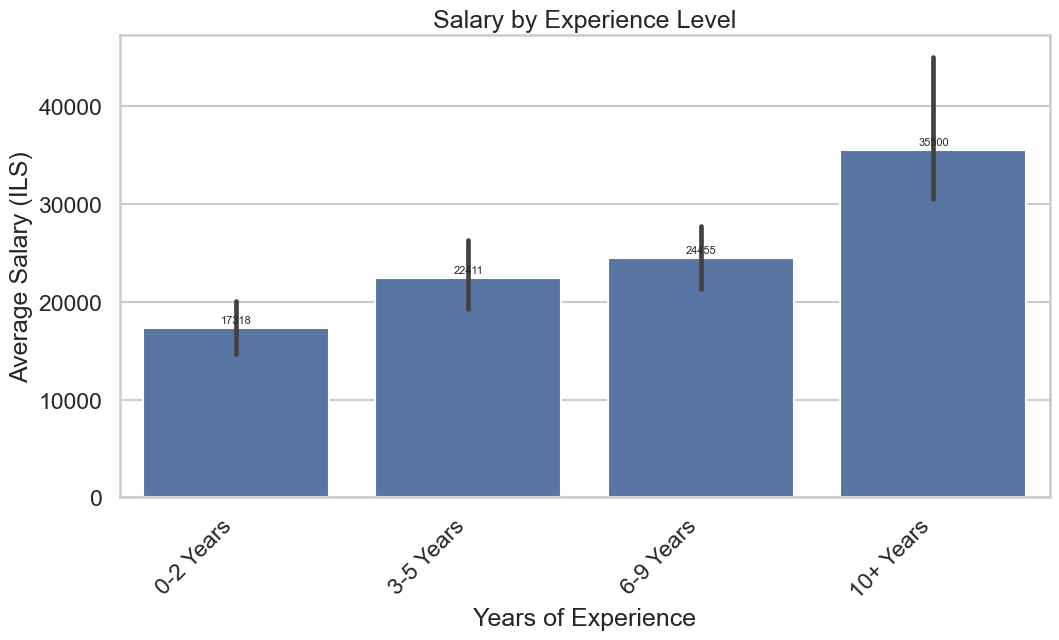

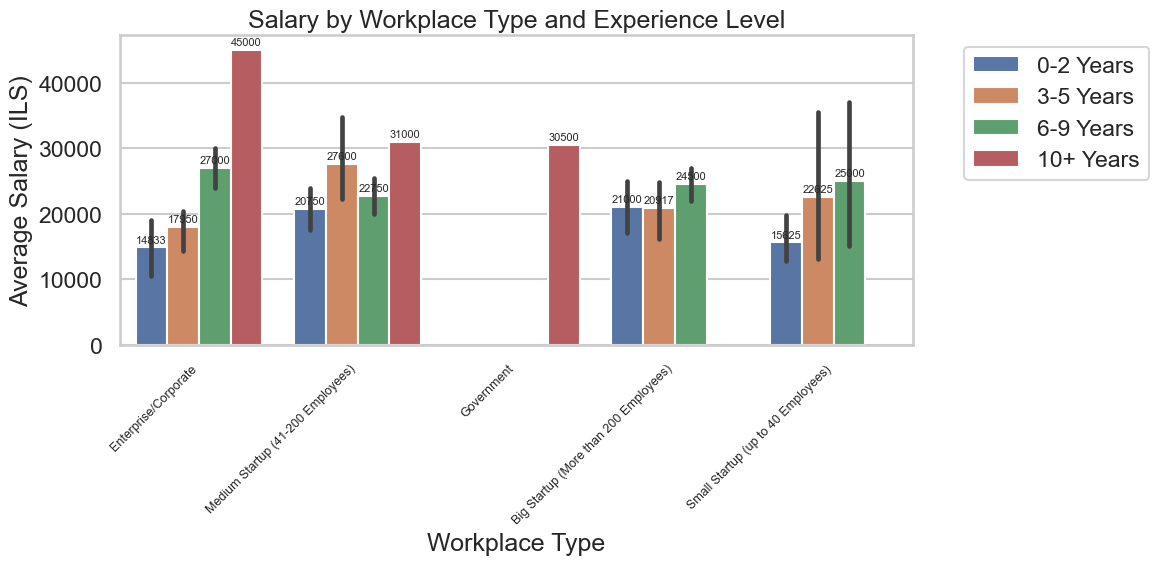

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the data into a pandas DataFrame
df = file.copy()

# Clean and prepare the data
df = df.dropna(subset=['Monthly Gross Salary (Bruto)'])
df['Monthly Gross Salary (Bruto)'] = df['Monthly Gross Salary (Bruto)'].astype(float)

# Set style for better visibility
sns.set_theme(style="whitegrid", context="talk")

# # Salary by experience level
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(x='Experience', y='Monthly Gross Salary (Bruto)', data=df)
# plt.xlabel('Years of Experience')
# plt.ylabel('Average Salary (ILS)')
# plt.title('Salary by Experience Level')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.savefig('salary_by_experience.png')


# # Salary by experience and workplace type
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(x='Type of Workplace', y='Monthly Gross Salary (Bruto)', hue='Experience', data=df)
# plt.xlabel('Workplace Type')
# plt.ylabel('Average Salary (ILS)')
# plt.title('Salary by Workplace Type and Experience Level')
# plt.xticks(rotation=45, ha='right', fontsize = 8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.savefig('salary_by_workplace_and_experience.png')

exp_order = ['0-2 Years', '3-5 Years', '6-9 Years', '10+ Years']

# Salary by experience level
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Experience', y='Monthly Gross Salary (Bruto)',
                 data=df, order=exp_order)
plt.xlabel('Years of Experience'); plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Experience Level')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=8, padding=2)
#plt.tight_layout()
plt.savefig('salary_by_experience.png', bbox_inches='tight')




# Salary by experience and workplace type
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Type of Workplace', y='Monthly Gross Salary (Bruto)',
                 hue='Experience', data=df, hue_order=exp_order)
plt.xlabel('Workplace Type'); plt.ylabel('Average Salary (ILS)')
plt.title('Salary by Workplace Type and Experience Level')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=8, padding=2)
#plt.savefig('salary_by_workplace_and_experience.png')
plt.savefig('salary_by_workplace_and_experience.png', bbox_inches='tight')

In [51]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Special Knowledge             44 non-null     object 
 1   Experience                    44 non-null     object 
 2   Type of Workplace             44 non-null     object 
 3   Workplace - Other             0 non-null      float64
 4   People Management             44 non-null     object 
 5   Salary Type                   44 non-null     object 
 6   Monthly Gross Salary (Bruto)  44 non-null     float64
 7   Extra Benefits                44 non-null     float64
 8   Hourly Salary Rate            44 non-null     float64
 9   Technical Skills              44 non-null     object 
 10  Hands-on                      44 non-null     object 
 11  Team Size                     24 non-null     object 
 12  Job Responsibilities          44 non-null     object 
 13  Total Salary

Experience buckets: [NaN]
Categories (4, object): ['0-2 years' < '3-5 years' < '6-9 years' < '10+ years']
Average Salary: 22540.91 ILS
Median Salary: 21250.00 ILS
Minimum Salary: 10500.00 ILS
Maximum Salary: 45000.00 ILS


C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\440843168.py:102: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\440843168.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\440843168.py:102: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\440843168.py:117: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\440843168.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

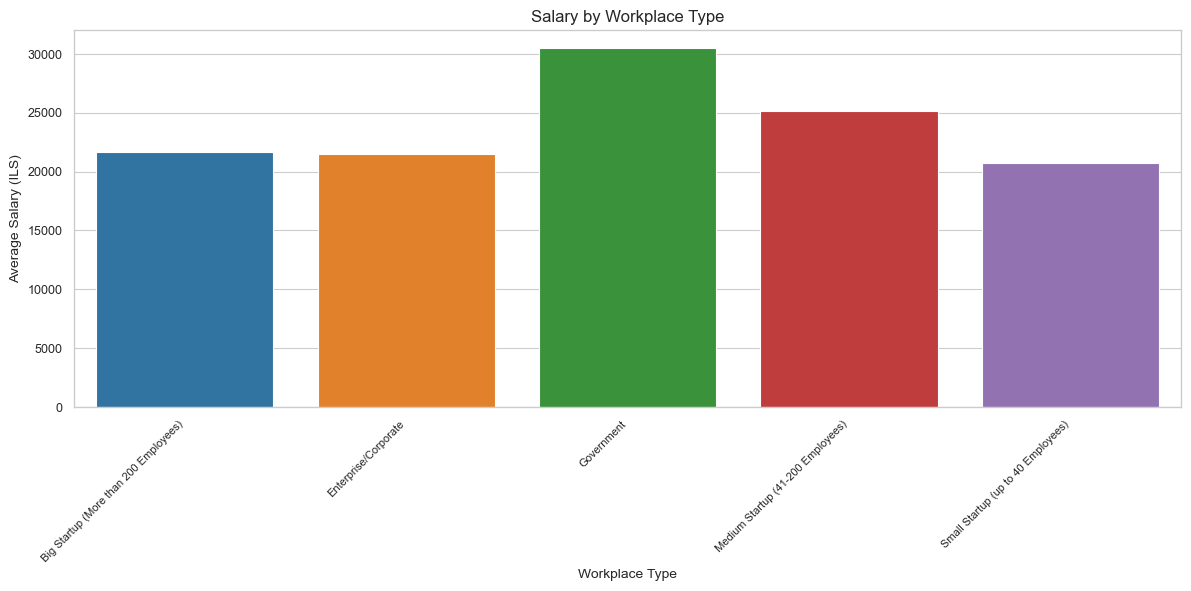

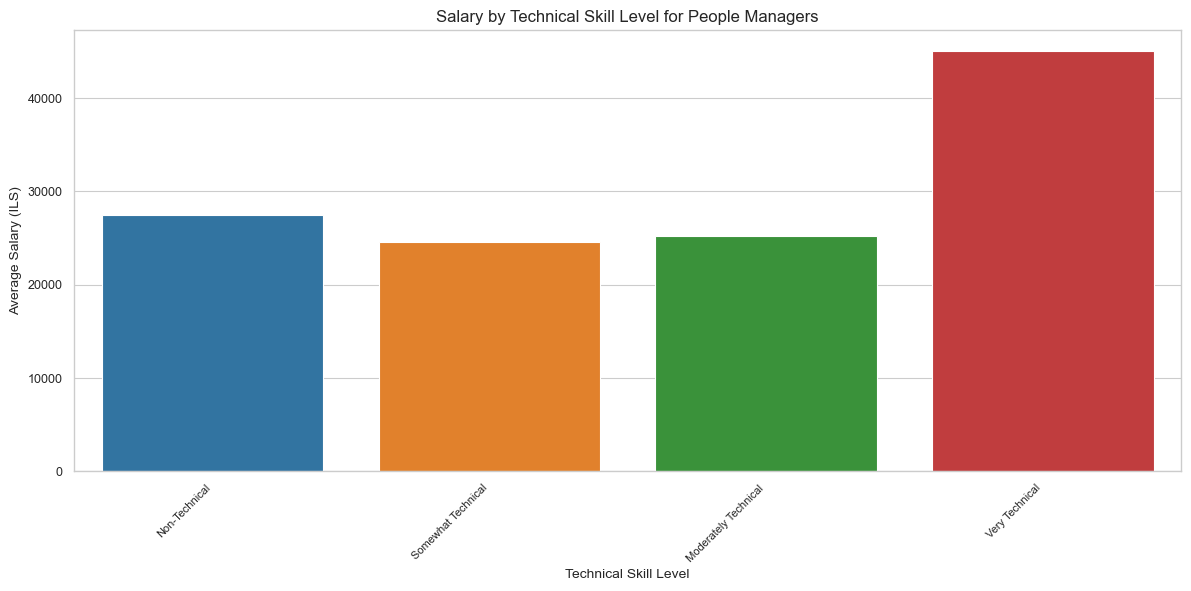

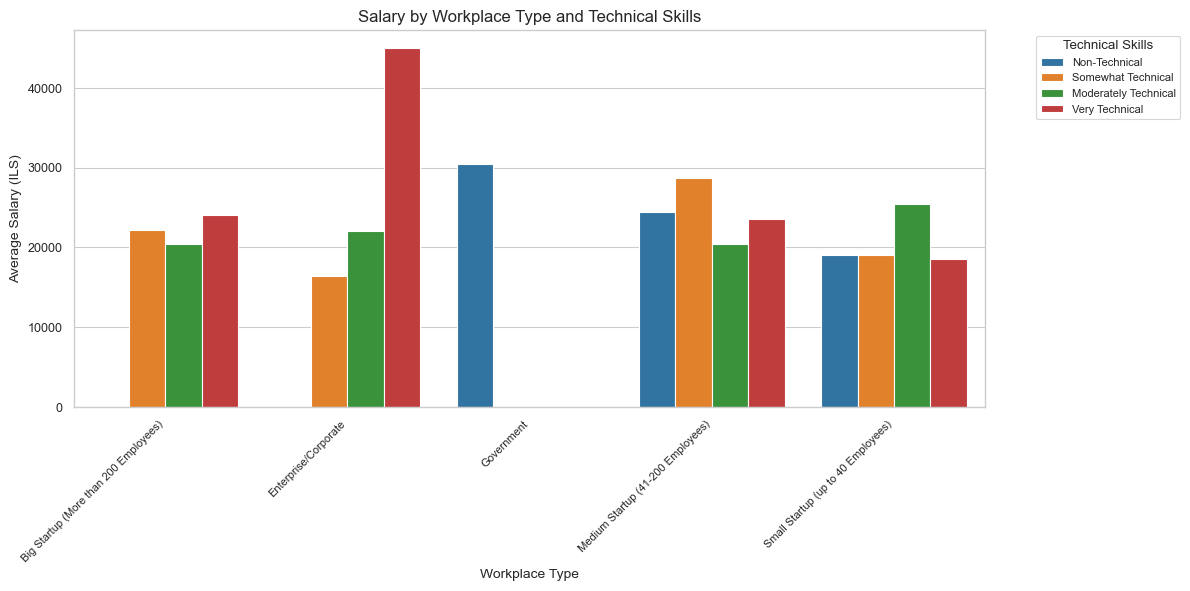

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# THEME & GLOBAL SETTINGS
# -------------------------
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={
    "xtick.labelsize": 8,
    "ytick.labelsize": 9,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "legend.fontsize": 8,
})
# One palette for everything
unified_palette = sns.color_palette("tab10")
sns.set_palette(unified_palette)

def rotate_x(ax):
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


import numpy as np
import pandas as pd

# Desired order
exp_order = ['0-2 years', '3-5 years', '6-9 years', '10+ years']

def bucket_experience(col: pd.Series) -> pd.Categorical:
    """
    Normalize various 'experience' formats into the 4 canonical buckets.
    Handles numeric values (e.g. 4), ranges (e.g. '3-5', '6–9'),
    and '10+' style strings.
    """
    s = col.astype(str).str.strip()

    # Detect explicit plus (e.g., '10+', '12+ years')
    plus_mask = s.str.contains(r'\+', na=False)

    # Extract the first number (works for '0-2', '3–5', '10+ years', '7', etc.)
    num = pd.to_numeric(s.str.extract(r'(\d+)', expand=False), errors='coerce')

    # Bin by the first number
    buckets = pd.cut(
        num,
        bins=[-np.inf, 2, 5, 9, np.inf],
        labels=exp_order
    ).astype(object)

    # Force anything with a '+' to the '10+ years' bucket (when we found a number)
    buckets[plus_mask & num.notna()] = '10+ years'

    # Return as ordered categorical
    return pd.Categorical(buckets, categories=exp_order, ordered=True)

# Apply the normalization
df['Experience'] = bucket_experience(df['Experience'])

# (Optional) sanity check
print("Experience buckets:", df['Experience'].unique())

# -------------------------
# DATA PREP
# -------------------------
df = file.copy()

df = df.dropna(subset=['Monthly Gross Salary (Bruto)'])
df['Monthly Gross Salary (Bruto)'] = df['Monthly Gross Salary (Bruto)'].astype(float)

# Experience ordering
exp_order = ['0-2 years', '3-5 years', '6-9 years', '10+ years']
df['Experience'] = pd.Categorical(df['Experience'], categories=exp_order, ordered=True)

# Technical Skills ordering (kept from your original)
skill_order = ['Non-Technical', 'Somewhat Technical', 'Moderately Technical', 'Very Technical']
df['Technical Skills'] = pd.Categorical(df['Technical Skills'], categories=skill_order, ordered=True)

# Stable order for workplace labels
workplace_order = sorted(df['Type of Workplace'].dropna().unique())

# Salary stats
salary_mean  = df['Monthly Gross Salary (Bruto)'].mean()
salary_median= df['Monthly Gross Salary (Bruto)'].median()
salary_min   = df['Monthly Gross Salary (Bruto)'].min()
salary_max   = df['Monthly Gross Salary (Bruto)'].max()

print(f'Average Salary: {salary_mean:.2f} ILS')
print(f'Median Salary: {salary_median:.2f} ILS')
print(f'Minimum Salary: {salary_min:.2f} ILS')
print(f'Maximum Salary: {salary_max:.2f} ILS')





# -------------------------
# 3) Salary by workplace (colorful)
# -------------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df, x='Type of Workplace', y='Monthly Gross Salary (Bruto)',
    order=workplace_order, estimator=np.mean, ci=None, palette=unified_palette
)
ax.set_xlabel('Workplace Type'); ax.set_ylabel('Average Salary (ILS)')
ax.set_title('Salary by Workplace Type')
rotate_x(ax)
plt.tight_layout()
plt.savefig('salary_by_workplace.png', dpi=300, bbox_inches='tight')

# -------------------------
# 4) Salary by technical skills (ordered + same palette)
# -------------------------

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df, x='Technical Skills', y='Monthly Gross Salary (Bruto)',
    order=skill_order, estimator=np.mean, ci=None, palette=unified_palette
)
ax.set_xlabel('Technical Skill Level'); ax.set_ylabel('Average Salary (ILS)')
ax.set_title('Salary by Technical Skill Level for People Managers')
rotate_x(ax)
plt.tight_layout()
plt.savefig('salary_by_technical_skills.png', dpi=300, bbox_inches='tight')



# -------------------------
# 6) Workplace × Technical Skills (same palette)
# -------------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df, x='Type of Workplace', y='Monthly Gross Salary (Bruto)',
    hue='Technical Skills', order=workplace_order, hue_order=skill_order,
    estimator=np.mean, ci=None, palette=unified_palette
)
ax.set_xlabel('Workplace Type'); ax.set_ylabel('Average Salary (ILS)')
ax.set_title('Salary by Workplace Type and Technical Skills')
rotate_x(ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Technical Skills')
plt.tight_layout()
plt.savefig('salary_by_workplace_and_technical_skills.png', dpi=300, bbox_inches='tight')





C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\2877275421.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\2877275421.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(


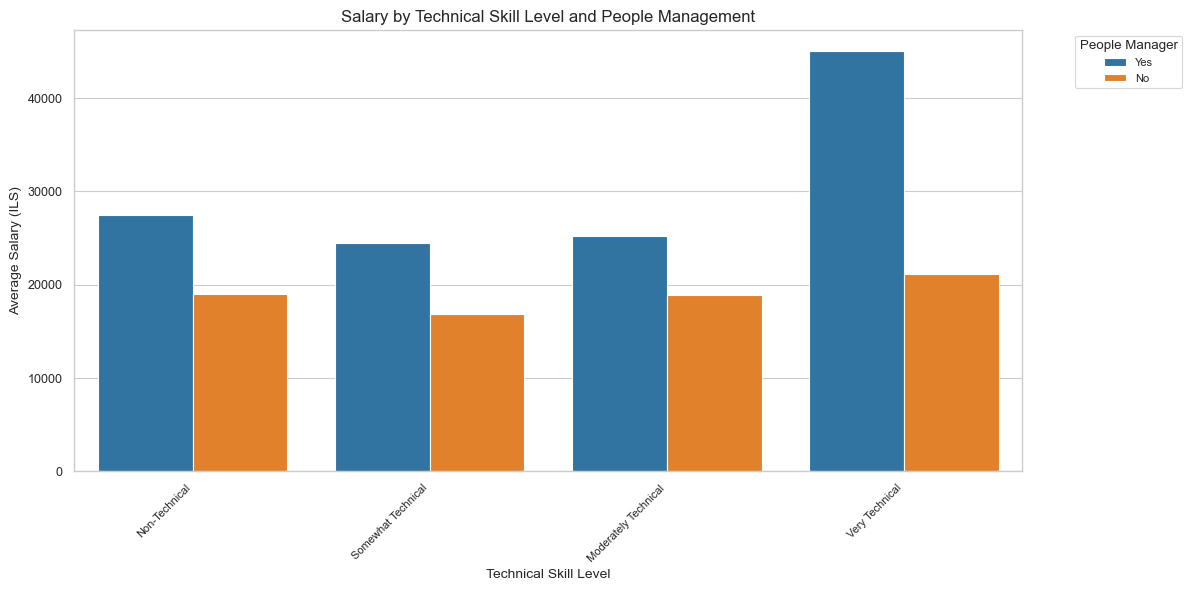

In [165]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x='Technical Skills',
    y='Monthly Gross Salary (Bruto)',
    hue='People Management',          # 👈 split each skill into Yes/No bars
    order=skill_order,
    estimator=np.mean,
    ci=None,
    palette=unified_palette
)

ax.set_xlabel('Technical Skill Level')
ax.set_ylabel('Average Salary (ILS)')
ax.set_title('Salary by Technical Skill Level and People Management')
rotate_x(ax)

plt.legend(title="People Manager", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_by_technical_skills.png', dpi=300, bbox_inches='tight')


C:\Users\ydool\AppData\Local\Temp\ipykernel_40376\1452545143.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:0.0f}%'.format(y) for y in y_values])


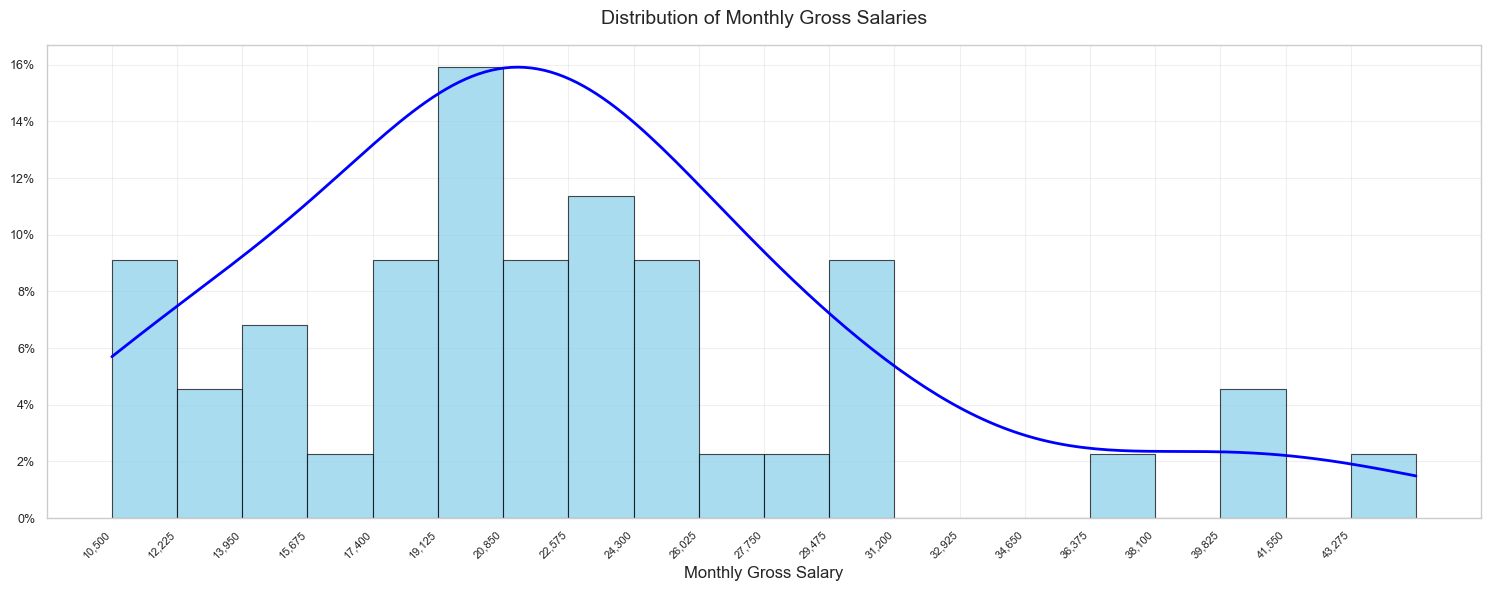

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Extract salaries from the data
salaries = df['Monthly Gross Salary (Bruto)'].to_list()

# Create the plot with improved styling
plt.figure(figsize=(15, 6))

# Histogram
weights = np.ones_like(salaries) / len(salaries) * 100
counts, bins, _ = plt.hist(salaries, bins=20, weights=weights, color='skyblue', edgecolor='black', alpha=0.7)

# Kernel Density Estimation for trend line
kde = gaussian_kde(salaries)
x_range = np.linspace(min(salaries), max(salaries), 200)
trend_line = kde(x_range)
# Scale trend line to match histogram percentages
trend_line = trend_line / trend_line.max() * counts.max()
plt.plot(x_range, trend_line, color='blue', linewidth=2)

# Set the tick locations at the start of each bin
plt.xticks(bins[:-1], ['{:,.0f}'.format(b) for b in bins[:-1]], rotation=45, ha='right')

# Customize the plot
plt.title('Distribution of Monthly Gross Salaries', fontsize=14, pad=15)
plt.xlabel('Monthly Gross Salary', fontsize=12)
#plt.ylabel('Percentage of Employees (%)', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format y-axis labels to show integer percentages
y_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:0.0f}%'.format(y) for y in y_values])

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.savefig('salary_histogram.png')
# Show the plot
plt.show()

In [54]:
#experimental - adding job titles
responsibility_mapper = {
    "Data labeling/annotation": 1,
    "Data collection": 1,
    "Data curation (defining data+metadata/selecting data for labeling)": 1,
    "AI/ML model output manual evaluation": 1,
    "Data quality checks (data QA)": 2,
    "Data quality analysis (Root cause analysis/quality process ownership)": 2,
    "AI/ML model quality criteria definition": [2, 3],
    "Manage work by data labelers/collectors/etc (inhouse or outsource)": [2, 3],
    "Semantic modeling + taxonomy": 2,
    "Data acquisition/scraping": 2,
    "Labeling guidelines ownership": 2,
    "Documentation": 2,
    "QA management": 3,
    "Budget/resource allocation+management": 3,
    "Goal planning": 3,
    "Managing cross-functional relationships": 3,
    "Process ownership": 3,
    "KPIs and Reporting": 3,
}

In [55]:
file.head()

,Special Knowledge,Experience,Type of Workplace,Workplace - Other,People Management,Salary Type,Monthly Gross Salary (Bruto),Extra Benefits,Hourly Salary Rate,Technical Skills,Hands-on,Team Size,Job Responsibilities,Total Salary
0,Yes,10+ Years,Enterprise/Corporate,NaN,Yes,Global Salary,45000.0,0.0,0.0,Very Technical,~50% of my work is hands on,Up to 5 people,"Data collection,Data labeling/annotation,Data ...",45000.0
1,Yes,3-5 Years,Medium Startup (41-200 Employees),NaN,Yes,Global Salary,40000.0,0.0,0.0,Somewhat Technical,~50% of my work is hands on,Over 12 people,"Budget/resource allocation+management,Managing...",40000.0
2,No,10+ Years,Government,NaN,Yes,Global Salary,30500.0,0.0,0.0,Non-Technical,~50% of my work is hands on,Between 6 and 12 people,"Data labeling/annotation,Documentation,Labelin...",30500.0
3,No,3-5 Years,Big Startup (More than 200 Employees),NaN,Yes,Global Salary,28000.0,1000.0,0.0,Somewhat Technical,Less than 20% of my work is hands on,Between 6 and 12 people,"Process ownership,Goal planning,Budget/resourc...",28000.0
4,No,6-9 Years,Medium Startup (41-200 Employees),NaN,Yes,Global Salary,26000.0,0.0,0.0,Somewhat Technical,~50% of my work is hands on,Up to 5 people,Data curation (defining data+metadata/selectin...,26000.0


In [56]:
import re
from collections import Counter

def map_and_count_categories(df, col="Job Responsibilities", mapper=None, print_unknown=True):
    if mapper is None:
        raise ValueError("Pass responsibility_mapper via the 'mapper' argument.")

    # case-insensitive lookup
    lc_mapper = {k.strip().lower(): v for k, v in mapper.items()}

    cat1, cat2, cat3 = [], [], []
    unknowns = set()

    # split on common list delimiters: comma, semicolon, newline, pipe, bullets
    splitter = re.compile(r"[,\n;|•·]+")  # add more if your data uses others

    for raw in df[col].fillna(""):
        # get items from the cell
        if isinstance(raw, str):
            items = [s.strip().strip('"').strip("'") for s in splitter.split(raw) if s.strip()]
        else:
            # non-strings: treat as a single item string
            items = [str(raw).strip()]

        counts = Counter({1: 0, 2: 0, 3: 0})

        for item in items:
            key = item.lower()
            cats = lc_mapper.get(key)

            if cats is None:
                unknowns.add(item)  # keep original casing for readability
                continue

            # cats can be int or list like [2, 3]
            if isinstance(cats, int):
                counts[cats] += 1
            else:
                for c in cats:
                    counts[c] += 1

        cat1.append(counts[1])
        cat2.append(counts[2])
        cat3.append(counts[3])

    out = df.copy()
    out["Resp_Count_Cat1"] = cat1
    out["Resp_Count_Cat2"] = cat2
    out["Resp_Count_Cat3"] = cat3

    if print_unknown and unknowns:
        print("Unknown responsibilities (not in responsibility_mapper):")
        for u in sorted(unknowns):
            print("-", u)

    return out, unknowns


In [57]:
# assuming `responsibility_mapper` is defined from earlier
df_with_counts, unknowns = map_and_count_categories(
    file, col="Job Responsibilities", mapper=responsibility_mapper
)

# (optional) overall totals across the dataset:
totals = df_with_counts[["Resp_Count_Cat1","Resp_Count_Cat2","Resp_Count_Cat3"]].sum()
print(totals.to_dict())


{'Resp_Count_Cat1': 91, 'Resp_Count_Cat2': 158, 'Resp_Count_Cat3': 172}


In [58]:
#df_with_counts.to_csv(r'C:\Users\ydool\Downloads\salary survey test.csv', index=False)

In [59]:
import numpy as np
import pandas as pd

def add_category_percentages_and_decision(
    df,
    cat_cols=("Resp_Count_Cat1", "Resp_Count_Cat2", "Resp_Count_Cat3"),
    strong_single_threshold=0.55,
    combo_only_if_both=True,
    consider_triad=True,
    triad_only_if_all=True,
    triad_min_share=0.25,   # require each of 1/2/3 to be ≥ this share to label "1+2+3"
    round_pct=3,
    display_decimals=0,
):
    """
    Computes % for Cat1/2/3, also 1+2, 2+3, and (optionally) 1+2+3.
    Picks Top_Category per row among {1,2,3,1+2,2+3,(1+2+3)}, with rules:
      - If a single cat ≥ strong_single_threshold, choose it.
      - Else consider combos:
          • 1+2 if both present (or combo_only_if_both=False)
          • 2+3 if both present (or combo_only_if_both=False)
          • 1+2+3 if allowed and balanced: all present (if triad_only_if_all=True)
            AND min(p1,p2,p3) ≥ triad_min_share.
    Returns (df_with_columns, summary_dict). Adds *_str columns like "55%".
    """
    c1, c2, c3 = cat_cols
    out = df.copy()

    # numeric % (0..1)
    totals = (out[c1].fillna(0) + out[c2].fillna(0) + out[c3].fillna(0)).replace(0, np.nan)
    out["Pct_Cat1"] = (out[c1] / totals).fillna(0.0)
    out["Pct_Cat2"] = (out[c2] / totals).fillna(0.0)
    out["Pct_Cat3"] = (out[c3] / totals).fillna(0.0)
    out["Pct_1+2"]  = (out["Pct_Cat1"] + out["Pct_Cat2"]).clip(0, 1)
    out["Pct_2+3"]  = (out["Pct_Cat2"] + out["Pct_Cat3"]).clip(0, 1)
    out["Pct_1+2+3"] = (out["Pct_Cat1"] + out["Pct_Cat2"] + out["Pct_Cat3"]).clip(0, 1)

    labels, shares, reasons = [], [], []
    for _, row in out.iterrows():
        p1, p2, p3 = row["Pct_Cat1"], row["Pct_Cat2"], row["Pct_Cat3"]
        cc1, cc2, cc3 = row[c1], row[c2], row[c3]

        if (cc1 + cc2 + cc3) == 0:
            labels.append("Unknown"); shares.append(0.0); reasons.append("No mapped responsibilities")
            continue

        # single-category dominance rule
        singles = {"1": p1, "2": p2, "3": p3}
        top_single_label = max(singles, key=singles.get)
        top_single_val = singles[top_single_label]
        if top_single_val >= strong_single_threshold:
            labels.append(top_single_label)
            shares.append(top_single_val)
            reasons.append(f"Single '{top_single_label}' >= {strong_single_threshold:.0%}")
            continue

        # candidates: singles + allowed combos
        candidates = {"1": p1, "2": p2, "3": p3}
        if (not combo_only_if_both) or (cc1 > 0 and cc2 > 0):
            candidates["1+2"] = p1 + p2
        if (not combo_only_if_both) or (cc2 > 0 and cc3 > 0):
            candidates["2+3"] = p2 + p3

        # triad option (guarded so it represents *balanced* blends)
        if consider_triad:
            all_present_ok = (not triad_only_if_all) or (cc1 > 0 and cc2 > 0 and cc3 > 0)
            balanced_ok = (min(p1, p2, p3) >= triad_min_share) if triad_min_share is not None else True
            if all_present_ok and balanced_ok:
                candidates["1+2+3"] = p1 + p2 + p3  # equals 1 when totals > 0

        top_label = max(candidates, key=candidates.get)
        labels.append(top_label)
        shares.append(candidates[top_label])
        reasons.append("Argmax among singles+combos")

    out["Top_Category"] = labels
    out["Top_Share"]    = np.round(shares, round_pct)
    out["Decision_Why"] = reasons

    # pretty "%"" columns
    def fmt_pct(x):
        if display_decimals <= 0:
            return f"{round(x*100):d}%"
        return f"{x*100:.{display_decimals}f}%"

    for col in ["Pct_Cat1","Pct_Cat2","Pct_Cat3","Pct_1+2","Pct_2+3","Pct_1+2+3","Top_Share"]:
        out[col + "_str"] = out[col].apply(fmt_pct)

    # dataset summary
    sums = out[[c1, c2, c3]].sum()
    total_all = sums.sum()
    overall_pct = (sums / total_all).fillna(0.0) if total_all > 0 else pd.Series({c1:0, c2:0, c3:0})
    overall_pct_named = {
        "Cat1": overall_pct.get(c1, 0.0),
        "Cat2": overall_pct.get(c2, 0.0),
        "Cat3": overall_pct.get(c3, 0.0),
        "Cat1+2": overall_pct.get(c1, 0.0) + overall_pct.get(c2, 0.0),
        "Cat2+3": overall_pct.get(c2, 0.0) + overall_pct.get(c3, 0.0),
        "Cat1+2+3": 1.0 if total_all > 0 else 0.0,  # always 100% of mapped work
    }
    label_dist = out["Top_Category"].value_counts(normalize=True).to_dict()

    summary = {
        "overall_counts": { "Cat1": int(sums[c1]), "Cat2": int(sums[c2]), "Cat3": int(sums[c3]) },
        "overall_percentages_numeric": {k: round(v, round_pct) for k, v in overall_pct_named.items()},
        "overall_percentages_str": {k: fmt_pct(v) for k, v in overall_pct_named.items()},
        "top_category_distribution_numeric": {k: round(v, round_pct) for k, v in label_dist.items()},
        "top_category_distribution_str": {k: fmt_pct(v) for k, v in label_dist.items()},
    }

    return out, summary



In [60]:
df2, summary = add_category_percentages_and_decision(df_with_counts)




In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 48
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Special Knowledge             44 non-null     object 
 1   Experience                    44 non-null     object 
 2   Type of Workplace             44 non-null     object 
 3   Workplace - Other             0 non-null      float64
 4   People Management             44 non-null     object 
 5   Salary Type                   44 non-null     object 
 6   Monthly Gross Salary (Bruto)  44 non-null     float64
 7   Extra Benefits                44 non-null     float64
 8   Hourly Salary Rate            44 non-null     float64
 9   Technical Skills              44 non-null     object 
 10  Hands-on                      44 non-null     object 
 11  Team Size                     24 non-null     object 
 12  Job Responsibilities          44 non-null     object 
 13  Total Salary

In [62]:
#df2.to_csv(r'C:\Users\ydool\Downloads\salary survey test4.csv', index=False)

In [63]:
CATEGORY_LABEL_MAP = {
    "1": "Practical",
    "2": "Tactical",
    "3": "Strategic",
    "1+2": "Practical+Tactical",
    "2+3": "Tactical+Strategic",
    "1+2+3": "Fullstack (Practical+Tactical+Strategic)",
    "Unknown": "Unknown",
}



In [64]:
df2['Job Type'] = df2['Top_Category'].map(CATEGORY_LABEL_MAP)

In [65]:
df2['Job Type'].unique()

array(['Tactical+Strategic', 'Strategic',
       'Fullstack (Practical+Tactical+Strategic)', 'Practical+Tactical',
       'Tactical', 'Practical'], dtype=object)

In [66]:
df2 = pd.read_csv(r'C:\Users\ydool\Downloads\salary survey test4.csv')

In [67]:
df2 = df2[df2['Salary Type']=='Global Salary'].copy()

In [68]:
group_and_summarize(df2,['Job Type','Experience'],'Total Salary' )

,Job Type,Experience,Range,Median,Comment
0,Practical,0-2 Years,"15,000 - 15,000","15,000",< 3 people
1,Practical,3-5 Years,"11,000 - 11,000","11,000",< 3 people
2,Practical+Tactical,0-2 Years,"10,500 - 17,500","12,500",
3,Practical+Tactical,3-5 Years,"11,000 - 21,000","19,850",
4,Strategic,3-5 Years,"19,500 - 41,000","24,000",
5,Strategic,6-9 Years,"20,000 - 24,000","22,000",< 3 people
6,Tactical,3-5 Years,"21,500 - 21,500","21,500",< 3 people
7,Tactical,6-9 Years,"27,000 - 27,000","27,000",< 3 people
8,Tactical+Strategic,0-2 Years,"13,000 - 25,000","19,000",
9,Tactical+Strategic,10+ Years,"30,500 - 45,000","31,000",


In [69]:
print(group_and_summarize(df2,['Job Type','Experience'],'Total Salary' ).to_markdown(index=False))

| Job Type           | Experience   | Range           | Median   | Comment    |
|:-------------------|:-------------|:----------------|:---------|:-----------|
| Practical          | 0-2 Years    | 15,000 - 15,000 | 15,000   | < 3 people |
| Practical          | 3-5 Years    | 11,000 - 11,000 | 11,000   | < 3 people |
| Practical+Tactical | 0-2 Years    | 10,500 - 17,500 | 12,500   |            |
| Practical+Tactical | 3-5 Years    | 11,000 - 21,000 | 19,850   |            |
| Strategic          | 3-5 Years    | 19,500 - 41,000 | 24,000   |            |
| Strategic          | 6-9 Years    | 20,000 - 24,000 | 22,000   | < 3 people |
| Tactical           | 3-5 Years    | 21,500 - 21,500 | 21,500   | < 3 people |
| Tactical           | 6-9 Years    | 27,000 - 27,000 | 27,000   | < 3 people |
| Tactical+Strategic | 0-2 Years    | 13,000 - 25,000 | 19,000   |            |
| Tactical+Strategic | 10+ Years    | 30,500 - 45,000 | 31,000   |            |
| Tactical+Strategic | 3-5 Years    | 12

In [70]:
group_and_summarize(df2,['Job Type','Type of Workplace'],'Total Salary' )

,Job Type,Type of Workplace,Range,Median,Comment
0,Practical,Big Startup (More than 200 Employees),"11,000 - 11,000","11,000",< 3 people
1,Practical,Enterprise/Corporate,"15,000 - 15,000","15,000",< 3 people
2,Practical+Tactical,Big Startup (More than 200 Employees),"21,000 - 21,000","21,000",< 3 people
3,Practical+Tactical,Enterprise/Corporate,"10,500 - 20,700","19,000",
4,Practical+Tactical,Medium Startup (41-200 Employees),"17,500 - 17,500","17,500",< 3 people
5,Practical+Tactical,Small Startup (up to 40 Employees),"11,000 - 12,500","11,750",< 3 people
6,Strategic,Big Startup (More than 200 Employees),"24,000 - 24,000","24,000",< 3 people
7,Strategic,Enterprise/Corporate,"24,000 - 24,000","24,000",< 3 people
8,Strategic,Medium Startup (41-200 Employees),"20,000 - 40,000","23,500",
9,Strategic,Small Startup (up to 40 Employees),"19,500 - 41,000","30,250",< 3 people


In [71]:
print(group_and_summarize(df2,['Job Type','Type of Workplace'],'Total Salary' ).to_markdown(index=False))

| Job Type           | Type of Workplace                     | Range           | Median   | Comment    |
|:-------------------|:--------------------------------------|:----------------|:---------|:-----------|
| Practical          | Big Startup (More than 200 Employees) | 11,000 - 11,000 | 11,000   | < 3 people |
| Practical          | Enterprise/Corporate                  | 15,000 - 15,000 | 15,000   | < 3 people |
| Practical+Tactical | Big Startup (More than 200 Employees) | 21,000 - 21,000 | 21,000   | < 3 people |
| Practical+Tactical | Enterprise/Corporate                  | 10,500 - 20,700 | 19,000   |            |
| Practical+Tactical | Medium Startup (41-200 Employees)     | 17,500 - 17,500 | 17,500   | < 3 people |
| Practical+Tactical | Small Startup (up to 40 Employees)    | 11,000 - 12,500 | 11,750   | < 3 people |
| Strategic          | Big Startup (More than 200 Employees) | 24,000 - 24,000 | 24,000   | < 3 people |
| Strategic          | Enterprise/Corporate            

In [72]:
group_and_summarize(df2,['Job Type'],'Total Salary' )

,Job Type,Range,Median,Comment
0,Practical,"11,000 - 15,000","13,000",< 3 people
1,Practical+Tactical,"10,500 - 21,000","17,500",
2,Strategic,"19,500 - 41,000","24,000",
3,Tactical,"21,500 - 27,000","24,250",< 3 people
4,Tactical+Strategic,"12,100 - 45,000","22,500",


In [73]:
print(group_and_summarize(df2,['Job Type'],'Total Salary' ).to_markdown(index=False))

| Job Type           | Range           | Median   | Comment    |
|:-------------------|:----------------|:---------|:-----------|
| Practical          | 11,000 - 15,000 | 13,000   | < 3 people |
| Practical+Tactical | 10,500 - 21,000 | 17,500   |            |
| Strategic          | 19,500 - 41,000 | 24,000   |            |
| Tactical           | 21,500 - 27,000 | 24,250   | < 3 people |
| Tactical+Strategic | 12,100 - 45,000 | 22,500   |            |


In [74]:
group_and_summarize(df2,['Job Type','Technical Skills'],'Total Salary' )

,Job Type,Technical Skills,Range,Median,Comment
0,Practical,Moderately Technical,"11,000 - 15,000","13,000",< 3 people
1,Practical+Tactical,Moderately Technical,"12,500 - 17,500","15,000",< 3 people
2,Practical+Tactical,Somewhat Technical,"10,500 - 21,000","19,000",
3,Strategic,Moderately Technical,"20,000 - 41,000","24,000",
4,Strategic,Somewhat Technical,"19,500 - 40,000","29,750",< 3 people
5,Strategic,Very Technical,"23,500 - 24,000","23,750",< 3 people
6,Tactical,Moderately Technical,"21,500 - 27,000","24,250",< 3 people
7,Tactical+Strategic,Moderately Technical,"19,000 - 30,000","22,500",
8,Tactical+Strategic,Non-Technical,"19,000 - 30,500","24,500",
9,Tactical+Strategic,Somewhat Technical,"12,100 - 37,000","22,500",


In [75]:
print(group_and_summarize(df2,['Job Type','Technical Skills'],'Total Salary' ).to_markdown(index=False))

| Job Type           | Technical Skills     | Range           | Median   | Comment    |
|:-------------------|:---------------------|:----------------|:---------|:-----------|
| Practical          | Moderately Technical | 11,000 - 15,000 | 13,000   | < 3 people |
| Practical+Tactical | Moderately Technical | 12,500 - 17,500 | 15,000   | < 3 people |
| Practical+Tactical | Somewhat Technical   | 10,500 - 21,000 | 19,000   |            |
| Strategic          | Moderately Technical | 20,000 - 41,000 | 24,000   |            |
| Strategic          | Somewhat Technical   | 19,500 - 40,000 | 29,750   | < 3 people |
| Strategic          | Very Technical       | 23,500 - 24,000 | 23,750   | < 3 people |
| Tactical           | Moderately Technical | 21,500 - 27,000 | 24,250   | < 3 people |
| Tactical+Strategic | Moderately Technical | 19,000 - 30,000 | 22,500   |            |
| Tactical+Strategic | Non-Technical        | 19,000 - 30,500 | 24,500   |            |
| Tactical+Strategic | Somewhat 

In [76]:
group_and_summarize(df2,['Job Type','Hands-on'],'Total Salary' )

,Job Type,Hands-on,Range,Median,Comment
0,Practical,Most/all of my work is hands on,"11,000 - 15,000","13,000",< 3 people
1,Practical+Tactical,Most/all of my work is hands on,"10,500 - 21,000","11,750",
2,Practical+Tactical,~50% of my work is hands on,"17,500 - 20,700","19,000",
3,Strategic,Less than 20% of my work is hands on,"24,000 - 41,000","32,500",< 3 people
4,Strategic,Most/all of my work is hands on,"19,500 - 24,000","21,750",< 3 people
5,Strategic,~50% of my work is hands on,"20,000 - 40,000","23,500",
6,Tactical,Less than 20% of my work is hands on,"21,500 - 21,500","21,500",< 3 people
7,Tactical,Most/all of my work is hands on,"27,000 - 27,000","27,000",< 3 people
8,Tactical+Strategic,Less than 20% of my work is hands on,"12,100 - 37,000","20,000",
9,Tactical+Strategic,Most/all of my work is hands on,"13,000 - 15,000","14,000",< 3 people


In [77]:
print(group_and_summarize(df2,['Job Type','Hands-on'],'Total Salary' ).to_markdown(index=False))

| Job Type           | Hands-on                             | Range           | Median   | Comment    |
|:-------------------|:-------------------------------------|:----------------|:---------|:-----------|
| Practical          | Most/all of my work is hands on      | 11,000 - 15,000 | 13,000   | < 3 people |
| Practical+Tactical | Most/all of my work is hands on      | 10,500 - 21,000 | 11,750   |            |
| Practical+Tactical | ~50% of my work is hands on          | 17,500 - 20,700 | 19,000   |            |
| Strategic          | Less than 20% of my work is hands on | 24,000 - 41,000 | 32,500   | < 3 people |
| Strategic          | Most/all of my work is hands on      | 19,500 - 24,000 | 21,750   | < 3 people |
| Strategic          | ~50% of my work is hands on          | 20,000 - 40,000 | 23,500   |            |
| Tactical           | Less than 20% of my work is hands on | 21,500 - 21,500 | 21,500   | < 3 people |
| Tactical           | Most/all of my work is hands on      | 27